In [1]:
!pip install Biopython
!pip install wordcloud
!pip install spacy
!pip install gensim
!pip install pyLDAvis
!python -m spacy download en_core_web_sm

import pandas as pd
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from pprint import pprint
from gensim.models import CoherenceModel
from gensim import corpora, models
import pyLDAvis
import pyLDAvis.gensim_models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 35.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 6.8 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This be

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [3]:
df=pd.read_csv('uc5_all_pmids.csv')
df

,PMID
0,32721652
1,31876895
2,33687468
3,32794450
4,34303292
...,...
8151,30367059
8152,31919418
8153,30643251
8154,32439900


In [4]:
lists=df['PMID'].tolist()
len(lists)

8156

In [5]:
from Bio import Entrez

Entrez.email = 'your_email@provider.com'

pmids = lists
handle = Entrez.efetch(db="pubmed", id=','.join(map(str, pmids)),
                       rettype="xml", retmode="text")
records = Entrez.read(handle)


abstract=[]
noma=0
n=0
for pubmed_article in records['PubmedArticle']:
  n=n+1           
  try:
    abstract.append(pubmed_article['MedlineCitation']['Article']['Abstract']['AbstractText'][0])
  except: 
    # abstract.append('\nno abstracts available.\n')
    noma=noma+1
    continue
    


# abstract_dict = dict(zip(pmids, abstracts))
abstract


['Lung cancer remains the leading cause of cancer related deaths worldwide. Lung cancer screening using low-dose computed tomography (LDCT) has been shown to reduce lung cancer specific mortality. In 2013, the United States Preventive Services Task Force (USPSTF) recommended annual lung cancer screening with LDCT for smokers aged between 55 years to 80 years, with at least 30 pack-years of smoking exposure that currently smoke or who have quit smoking within 15 years. Risk-based lung cancer screening is an alternative approach that defines screening eligibility based on the personal risk of individuals. Selection of individuals for lung cancer screening based on their personal lung cancer risk has been shown to improve the sensitivity and specificity associated with the eligibility criteria of the screening program as compared to the 2013 USPSTF criteria. Numerous risk prediction models have been developed to estimate the lung cancer risk of individuals incorporating sociodemographic, 

In [6]:
print(len(abstract))
print(noma)
print(n)

7762
38
7800


In [7]:
with open("stopwords.txt", "r") as f:
    sw = f.read().split()
    
for w in range(0,len(sw)):
  sw[w]=sw[w].strip()

In [8]:
abstract_=abstract.copy()
# abstract_

In [10]:
import re
import pandas as pd
from nltk.tokenize import word_tokenize

def lemmatize_and_remove_stopwords(sentence,ssww):

  lemmat=WordNetLemmatizer()

  stopWords = nltk.corpus.stopwords.words('english')
  extra = ssww
  stopWords.extend(extra)

  filtered_list = []
  stop_words = stopWords
  words = word_tokenize(sentence)
  for w in words:
      if w.lower() not in stop_words:
          filtered_list.append(lemmat.lemmatize(w))         

  return " ".join(filtered_list)

for x in range(0,len(abstract_)):
  abstract_[x]=re.sub(r'\b[A-Z]+[0-9]*s?\b','', abstract_[x])
  abstract_[x]=re.sub(r'[\(\[].*?[\)\]]','', abstract_[x])
  abstract_[x]=abstract_[x].lower()
  abstract_[x]=re.sub(r'attributes=.*}','',abstract_[x])
  abstract_[x]=re.sub(r'StringElement','',abstract_[x])
  abstract_[x]=re.sub(r'\(.{0,5}\)','',abstract_[x])
  abstract_[x]=re.sub(r'[^\w\s]','',abstract_[x])
  abstract_[x]=re.sub(r'[0-9]',' ',abstract_[x])
  abstract_[x]=re.sub(r'(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', abstract_[x])
  # abstract_[x]=re.sub(r'[a-z]+[^\w]+',' ',abstract_[x])
  abstract_[x]=re.sub(r'\xa0.*',' ',abstract_[x])
  abstract_[x]=lemmatize_and_remove_stopwords(abstract_[x],sw)

In [11]:
abstract_

['lung remains leading cause worldwide lung screening using lowdose computed tomography shown reduce lung specific united state preventive task force recommended annual lung screening smoker aged year year least packyears smoking exposure currently smoke quit smoking year riskbased lung screening alternative approach defines screening eligibility based personal individual selection individual lung screening based personal lung shown improve sensitivity specificity associated eligibility criterion screening criterion numerous prediction model developed estimate lung individual incorporating sociodemographic smoking factor associated lung age smoking history sex raceethnicity personal history history emphysema chronic obstructive pulmonary prediction model include biomarker germline mutation proteinbased biomarkers independent predictor addition smoking sociodemographic factor majority lung prediction model suitable selecting highrisk individual lung screening model developed predict pro

In [12]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data = abstract_
data_words = list(sent_to_words(data))

In [13]:
dictionary = gensim.corpora.Dictionary(data_words)
bow_corpus = [dictionary.doc2bow(doc) for doc in data_words]

from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [14]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    perplexity_values= []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=dictionary,num_topics=num_topics,random_state=100,update_every=1,passes=10,alpha='auto',per_word_topics=True,)        
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        perplexity_values.append(model.log_perplexity(corpus))


    return model_list, coherence_values, perplexity_values

In [15]:
model_list, coherence_values, perplexity_values = compute_coherence_values(dictionary=dictionary, corpus=corpus_tfidf, texts=data_words, start=10, limit=100, step=20)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

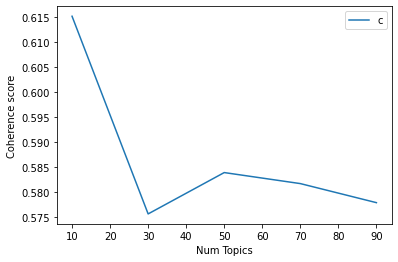

In [16]:
# Show graph
import matplotlib.pyplot as plt

limit=100; start=10; step=20;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [17]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 10  has Coherence Value of 0.6151
Num Topics = 30  has Coherence Value of 0.5756
Num Topics = 50  has Coherence Value of 0.5838
Num Topics = 70  has Coherence Value of 0.5816
Num Topics = 90  has Coherence Value of 0.5778


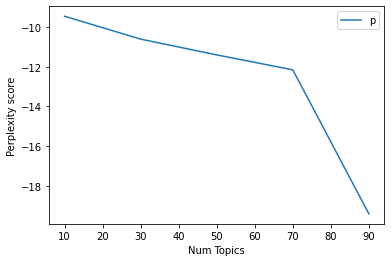

In [18]:
limit=100; start=10; step=20;
x = range(start, limit, step)
plt.plot(x, perplexity_values)
plt.xlabel("Num Topics")
plt.ylabel("Perplexity score")
plt.legend(("perplexity_values"), loc='best')
plt.show()

In [19]:
for m, cv in zip(x, perplexity_values):
    print("Num Topics =", m, " has perplixity Value of", round(cv, 4))

Num Topics = 10  has perplixity Value of -9.4566
Num Topics = 30  has perplixity Value of -10.6101
Num Topics = 50  has perplixity Value of -11.4051
Num Topics = 70  has perplixity Value of -12.1588
Num Topics = 90  has perplixity Value of -19.4223


In [21]:
lda_model2 = gensim.models.ldamodel.LdaModel(corpus=corpus_tfidf,
                                           id2word=dictionary,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True,
                                            )

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [22]:
pprint(lda_model2.print_topics())
doc_lda = lda_model2[corpus_tfidf]
## topic modeling new improved cleaning 30 topics

[(0,
  '0.011*"anastomotic" + 0.007*"leakage" + 0.005*"right" + 0.005*"leak" + '
  '0.004*"videoassisted" + 0.003*"reirradiation" + 0.003*"amyloidosis" + '
  '0.003*"thoracoscopic" + 0.003*"depressive" + 0.002*"fever"'),
 (1,
  '0.004*"sub" + 0.004*"pelvic" + 0.004*"noncommunicable" + 0.004*"air" + '
  '0.004*"pollution" + 0.003*"repeat" + 0.003*"transformation" + 0.003*"skull" '
  '+ 0.003*"preexisting" + 0.003*"atrial"'),
 (2,
  '0.008*"physical" + 0.007*"coronavirus" + 0.006*"vitamin" + 0.006*"dietary" '
  '+ 0.006*"pulmonary" + 0.006*"respiratory" + 0.006*"bleeding" + '
  '0.006*"consumption" + 0.005*"frailty" + 0.005*"aspirin"'),
 (3,
  '0.013*"statin" + 0.010*"gastrectomy" + 0.006*"distal" + '
  '0.004*"lymphadenectomy" + 0.004*"sepsis" + 0.003*"anterior" + '
  '0.003*"sorafenib" + 0.003*"bevacizumab" + 0.003*"pleural" + '
  '0.003*"emergency"'),
 (4,
  '0.004*"mesorectal" + 0.003*"promoter" + 0.003*"placement" + '
  '0.002*"multimodality" + 0.002*"intravenous" + 0.002*"methotrex

In [23]:
# Compute Perplexity
print('\nPerplexity: ', lda_model2.log_perplexity(corpus_tfidf))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model2, texts=data_words, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt


Perplexity:  -9.456579237163826

Coherence Score:  0.6151198524692669


In [24]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model2, corpus_tfidf, dictionary)
vis
## number of topics 30 // with improved cleaning

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.398797  0.002482       1        1  67.229866
2      0.061144  0.215694       2        1   7.445093
8      0.070986 -0.087524       3        1   6.861323
9      0.061953 -0.048766       4        1   6.517361
3      0.044050 -0.021661       5        1   3.296837
1      0.038910 -0.016837       6        1   2.469386
7      0.035488 -0.015980       7        1   2.081090
4      0.028676 -0.009599       8        1   1.430335
0      0.029210 -0.009051       9        1   1.338816
6      0.028379 -0.008758      10        1   1.329891, topic_info=               Term       Freq      Total Category  logprob  loglift
421        physical  19.000000  19.000000  Default  30.0000  30.0000
2418         statin  14.000000  14.000000  Default  29.0000  29.0000
2136            mir  17.000000  17.000000  Default  28.0000  28.0000
714     coronavirus  18.000000  18.000000  Default  27.0000  27.0000
3883    gastrectomy  11.000000  11.000000  Default  26.0000  26.0000
...             ...        ...        ...      ...      ...      ...
1212     suggestive   0.547511   0.984910  Topic10  -6.6862   3.7329
4977           soft   1.311696   2.637544  Topic10  -5.8125   3.6215
1645  posttreatment   0.716063   1.423524  Topic10  -6.4178   3.6330
459   cytoreductive   1.338862   6.504199  Topic10  -5.7920   2.7394
6056      emergency   0.658685   4.190476  Topic10  -6.5013   2.4697

[368 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
7227     10  0.617652     aberrantly
5398      3  0.921612       ablation
7108      8  0.938277  acceptability
1292      3  0.952877        achieve
1225      3  1.006372      adherence
...     ...       ...            ...
6774      4  0.954965          valve
1504      6  1.006011      vegetable
5746      9  0.989374  videoassisted
439       2  1.002060        vitamin
2122      7  0.528759          wound

[360 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 3, 9, 10, 4, 2, 8, 5, 1, 7])